In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import glob
import os
import cv2
from PIL import Image
from random import shuffle
import keras.layers as kl
import random
import pickle

In [162]:
tf=glob.glob('Downloads/chest_xray/train/*/**')

In [163]:
shuffle(tf)

In [164]:
tf

['Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1294-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person1244_bacteria_3200.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person846_virus_1491.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\IM-0515-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person1455_virus_2492.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-0806-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person751_bacteria_2654.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person544_virus_1074.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person323_virus_656.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person417_virus_850.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person257_bacteria_1194.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1221-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person432_virus_881.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1130-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person11

In [165]:
len(tf)

5216

In [166]:
X_train=np.zeros((len(tf),224,224))
Y_train=np.zeros((len(tf)))

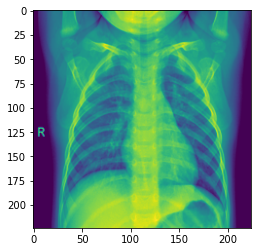

In [167]:
plt.imshow(Image.open(tf[0]).resize((224,224)))

In [168]:
# im=np.asarray(Image.open(tf[1]).resize())
# im=Image.open(tf[1])


In [98]:
for i,file in enumerate(tf):
    im=Image.open(file)
    im=im.convert('L')
    X_train[i,:,:]=im.resize((224,224))

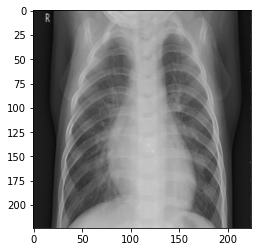

In [101]:
plt.imshow(Image.fromarray(X_train[random.randint(1,5000)]))

In [74]:
for i,file in enumerate(tf):
    if "NORMAL" in file:
        Y_train[i]=0
    elif "bacteria" in file:
        Y_train[i]=1
    elif "virus" in file:
        Y_train[i]=2
Y_train        

array([1., 2., 1., ..., 0., 1., 1.])

In [190]:
model=keras.Sequential()
model.add(kl.Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(224,224,1)))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Dropout(0.3))
model.add(kl.Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Conv2D(128,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.BatchNormalization())
model.add(kl.Conv2D(256,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Flatten())
model.add(kl.Dropout(0.5))
model.add(kl.Dense(512,activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(1,activation='softmax'))

In [191]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 112, 112, 32)      320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
dropout_23 (Dropout)         (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 28, 28, 64)      

In [193]:
model

In [194]:
X_train=X_train.reshape((len(X_train),224,224,1))
X_train.shape

(5216, 224, 224, 1)

In [195]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 231s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
147/147 [==============================] - 214s 1s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [173]:
# model_file='X-Ray_Prediction_model.sav'
# pickle.dump(model,open(model_file,'wb'))

TypeError: cannot pickle '_thread.RLock' object

In [196]:
testf=glob.glob('Downloads/chest_xray/test/*/**')
shuffle(testf)
testf

['Downloads/chest_xray/test\\PNEUMONIA\\person103_bacteria_488.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person21_virus_53.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person64_virus_122.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0325-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0025-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person101_bacteria_486.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0097-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person52_virus_106.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person51_virus_105.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person86_bacteria_428.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person92_bacteria_450.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person112_bacteria_539.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person46_virus_96.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person128_bacteria_608.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0362-0001.jpeg',
 'Download

In [202]:
X_test=np.zeros((len(testf),224,224))
Y_test=np.zeros((len(testf)))

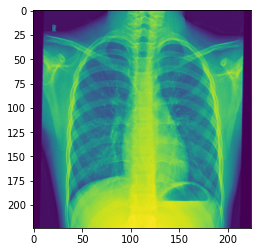

In [203]:
plt.imshow(Image.open(testf[random.randint(1,500)]).resize((224,224)))

In [204]:
for i,file in enumerate(testf):
    im=Image.open(file)
    im=im.convert('L')
    X_test[i,:,:]=im.resize((224,224))

In [205]:
testf

['Downloads/chest_xray/test\\PNEUMONIA\\person103_bacteria_488.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person21_virus_53.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person64_virus_122.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0325-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0025-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person101_bacteria_486.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0097-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person52_virus_106.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person51_virus_105.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person86_bacteria_428.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person92_bacteria_450.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person112_bacteria_539.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person46_virus_96.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person128_bacteria_608.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0362-0001.jpeg',
 'Download

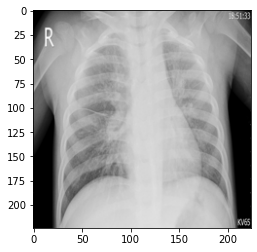

In [206]:
plt.imshow(Image.fromarray(X_test[random.randint(1,500)]))

In [207]:
X_test=X_test/255

In [217]:
for i,file in enumerate(testf):
    if "NORMAL" in file:
        Y_test[i]=0
    elif "bacteria" in file:
        Y_test[i]=1
    elif "virus" in file:
        Y_test[i]=2
print(Y_test)

[1. 2. 2. 0. 0. 1. 0. 2. 2. 1. 1. 1. 2. 1. 0. 0. 0. 0. 1. 1. 0. 2. 0. 0.
 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 1. 1. 2. 0. 2. 2. 0. 1. 1. 0. 2. 1. 1. 1.
 0. 1. 2. 2. 0. 2. 2. 0. 1. 0. 0. 0. 1. 1. 2. 1. 0. 2. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 2. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 2. 2. 1.
 0. 0. 0. 0. 2. 0. 0. 0. 2. 1. 2. 1. 0. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1.
 2. 1. 0. 2. 0. 2. 1. 2. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 2. 1. 2. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0.
 0. 0. 2. 2. 2. 0. 0. 2. 1. 1. 1. 1. 0. 2. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 2. 1. 1. 0. 0. 0. 0. 2. 2. 0. 2. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 2. 1.
 1. 2. 0. 0. 0. 2. 0. 1. 2. 0. 0. 0. 1. 0. 0. 1. 2. 2. 1. 1. 2. 2. 0. 0.
 0. 1. 0. 0. 0. 0. 2. 0. 1. 1. 1. 2. 2. 0. 1. 0. 2. 2. 2. 0. 1. 1. 2. 2.
 2. 0. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 2. 0. 0.
 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.

In [219]:
y_pre=model.predict(X_test[0].reshape(-1,224,224,1))
print(type(y_pre))
print(y_pre)

<class 'numpy.ndarray'>
[[1.]]
